# 03: Computing with Data in Python

<img src="figs/03_dist_points.png" alt="Drawing" width=450px/>

<center>Distance between pathological and healthy</center>

<center><img src="figs/03_dist_brains.png" alt="Drawing" width=370px/></center>
<center><img src="figs/03_dist_conn.png" alt="Drawing" width=370px/></center>

# Outline of ECE 3

- 01: Welcome to Python
- 02: Visualizing Data in Python
- **03: Computing with Data in Python**
- 04: Summarizing Data in Python
- 05: Predicting from Data with Machine Learning in Python
  - A. Clustering
  - B. Linear regression
  - C. Dimension Reduction

# Outline of Unit 03

- **03: Computing with Data in Python**
  - TBD
  - TBD

### Norm

$\color{#EF5645}{\text{Definition}}$: The _Euclidean norm_, or just _norm_, of an $n$-vector $x$ is:
$$||x|| = \sqrt{x_1^2 + ... + x_n^2} = \sqrt{x^Tx}.$$

$\color{#EF5645}{\text{Remark}}$: The norm is equal to the absolute value for $n=1$.

$\color{#047C91}{\text{Exercise}}$: Compute the norm of $x= (1, 1, 1)$.

### Properties of the Norm

$\color{#6D7D33}{\text{Properties}}$: For any scalar $\beta$ and any $n$-vectors $x, y$:
1. Homogeneity: $||\beta x|| = |\beta|||x||$
2. Triangle inequality: $$||x+y|| \leq ||x|| + ||y||$$
3. Nonnegative: $||x|| \geq 0$
4. Definite: $||x|| = 0$ if and only if $x = 0$

$\color{#003660}{\text{In Python}}$, the module `linalg` from the package `numpy` has a function called `norm`.

In [2]:
import numpy as np

x = np.array([2, -1, 2])

print(np.linalg.norm(x))

3.0


### Distance

$\color{#EF5645}{\text{Definition}}$: The _Euclidean distance_, or just _distance_, between $n$-vectors $a$ and $b$ is:
$$dist(a, b) = ||a - b||.$$

$\color{#EF5645}{\text{Remark}}$: This definition agrees with ordinary distance for $n = 1, 2, 3.$

$\color{#003660}{\text{In Python}}$, we can compute distances using `linalg.norm`.

1.4142135623730951


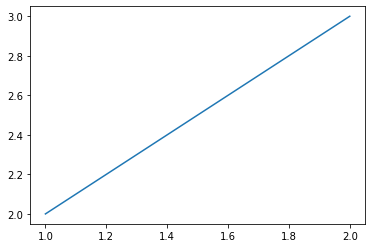

In [8]:
import matplotlib.pyplot as plt
a = np.array([1, 2]); b = np.array([2, 3])
distance_ab = np.linalg.norm(a - b); print(distance_ab)
plt.plot([a[0], b[0]], [a[1], b[1]]);

### Interpretation: Triangle inequality

$\color{#EF5645}{\text{Recall}}$: Triangle inequality: 
$$||x+y|| \leq ||x|| + ||y||.$$

Apply with: $x = a - b$ and $y = b - c$ and get:
$$||a - c|| \leq ||a - b|| + ||b - c||.$$
i.e. third edge is shorter than the sum of the other two.
<center><img src="figs/03_triangle.jpg" alt="Drawing" width=350px/></center>

$\color{#003660}{\text{In Python}}$, we can use a distance to compute differences between more complex data.

$\color{#047C91}{\text{Example}}$: Load brain connectomes data from the package `geomstats`.

In [14]:
import geomstats.datasets.utils as ds

data, patient_ids, labels = ds.load_connectomes()

Given $N$ brain areas: a _brain connectome_ is a $N \times N$ table where a value at row $i$ and column $j$ quantifies whether areas $i$ and $j$ are generally activated together.

We show connectome using colors with `imshow`.

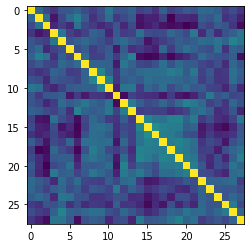

In [19]:
plt.imshow(data[0]);#print(data[0])

We verify that two schizophrenic subjects are "closer" than a schizophrenic subject and a healthy control.

In [25]:
print(labels[0:3])
healthy = data[0]; schiz1 = data[1]; schiz2 = data[2]
print(
    "healthy-schiz:", np.linalg.norm(healthy - schiz1))
print(
    "schiz-schiz: ", np.linalg.norm(schiz1 - schiz2))

[1 0 0]
healthy-schiz: 5.281496613975049
schiz-schiz:  4.461061135669169


### Nearest Neighbor

$\color{#EF5645}{\text{Definition}}$: Consider $z_1, . . . , z_m$ a list of $n$-vectors. We say that $z_j$ is the _nearest neighbor of the $n$-vector $x$_ if:
$$‖x − z_j ‖ ≤ ‖x − z_i ‖,$$
for all $i = 1, . . . , m$.

<center><img src="figs/03_nn.jpg" alt="default" width=300px/></center>

$\color{#047C91}{\text{Exercise}}$: Design an algorithm that can predict if a subject is schizophrenic or not, from its connectome.

### Angle

$\color{#EF5645}{\text{Definition}}$: The _angle_ between two non-zeros $n$-vectors $a$ and $b$ is:
$$\angle(a, b) = arccos( \frac{a^Tb}{||a||||b||} ).$$

$\color{#EF5645}{\text{Remark}}$: It coincides with the ordinary angle in 2D and 3D.

Write: $\theta = \angle(a, b)$ 
- $θ = π/2 = 90^\circ$: a, b are _orthogonal_: $a ⊥ b$ ($a^T b = 0$) 
- $θ = 0$: a, b are _aligned_ ($a^T b = ‖a‖ ‖b‖$) 
- $θ = π = 180^\circ$: a, b are _anti-aligned_ ($a^T b = −‖a‖ ‖b‖$)
- $θ ≤ π/2 = 90^\circ$: a, b make an _acute angle_ ($a^T b ≥ 0$)
- $θ ≥ π/2 = 90^\circ$: a, b make an _obtuse angle_ ($a^T b ≤ 0$)

<center><img src="figs/03_angles.jpg" alt="default"/></center>

$\color{#003660}{\text{In Python}}$:

In [37]:
import numpy as np
def angle(a, b):
    product = np.linalg.norm(a)* np.linalg.norm(b)
    fraction = np.inner(a, b) / (product)
    return np.arccos(fraction)

a = [1, 0]
b = [0, 1]

print(angle(a, b))
print(np.pi / 2)

1.5707963267948966
1.5707963267948966


### Cauchy-Schwarz Inequality

$\color{#6D7D33}{\text{Properties}}$: The angle $\angle(a, b)$ is the number in $[0, \pi]$ that satisfies: 
$$a^Tb = ||a||||b||\cos(\angle(a, b)).$$

$\color{#6D7D33}{\text{Theorem}}$: For any two $n$-vectors $a$ and $b$, we have the Cauchy-Schwarz inequality:
$$|a^Tb| \leq ||a||||b||.$$

inner-product, magnitude, scaling
Norm
Distance
Angle:
Homework: Datacamp: Intermediate python (4h)
matplotlib
Dictionaries & Pandas
Logic, Control Flow and Filtering
Loops
Case Study: Hacker Statistics


### Intro: 01 Vectors

A vector is roughly "a list of numbers": 

$\rightarrow$ everywhere in modern data and computer programs.

<center><img src="figs/00_image_a.jpg" alt="default" width=500px/></center>

<center><img src="figs/01_signal_vector.png" alt="default" width=600px/></center>



$\color{#EF5645}{\text{In this lecture, you will learn:}}$

### Vector length in Python

The size/length/dimension of a vector is computed with `len`, (for lists, tuples, and np.arrays).

In [54]:
l = [1, 2, 3, 4, 5, 6]
t = (1, 2, 3, 45, 6, 7, 3, 4)
a = np.array([1, 2, 3])
len(a)

3

### Block or Stacked Vectors

$\color{#EF5645}{\text{Definition}}$: Suppose $a, b, c$ are vectors with sizes $m, n, p$. We can create a new vector $d$ as:

<center><img src="figs/01_stack.png" alt="default" width=150px/></center>

The vector $d$ is called:
- a _block vector or a stacked vector with entries $a, b, c$_, 
- or simply the concatenation of $a, b, c$.


$\color{#EF5645}{\text{Remark}}$: The stack vector $d$ has size $m+n+p$ with the following components:

$$d = (a_1, ..., a_m, b_1, ..., b_n, c_1, ..., c_p).$$

### Block or Stacked Vectors

$\color{#003660}{\text{In Python}}$, we create a block vector using `concatenate` (from `numpy`).

In [29]:
import numpy as np
a = np.array([1.1, 2.2])
b = np.array([3.3, 4.4, 5.5])
c = np.array([6.6, 7.7])
d = np.concatenate([a, b, c])
d

array([1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7])

### Zero Vectors and Ones Vectors

$\color{#EF5645}{\text{Definition}}$: The n-vector with all entries 0 is denoted $0_n$ or just $0$ and is called a _zero vector_. 

$\color{#EF5645}{\text{Definition}}$: The n-vector with all entries 1 is denoted $1_n$ or just 1 and is called a _ones-vector_.

$\color{#003660}{\text{In Python}}$, we use `zeros` and `ones` (from `numpy`).

In [31]:
zeros2 = np.zeros(2)
print(zeros2)
zeros3 = np.zeros(3)
print(zeros3)
ones4 = np.ones(4)
print(ones4)

[0. 0.]
[0. 0. 0.]
[1. 1. 1. 1.]


### One-Hot Vectors

$\color{#EF5645}{\text{Definition}}$: A _one-hot vector_ is a vector which has one entry 1 and all others 0. If $i$ is the index of the non-zero entry, we denote it $e_i$.

$\color{#047C91}{\text{Exercise}}$: What are all the one-hot vectors of length 3?

In [33]:
"""Create one-hot vector e1 of len 3."""

e1 = np.zeros(3)
e1[1] = 1
e1

array([0., 1., 0.])

In ECE, a 2-vector $a=(a_1, a_2)$ can represent a displacement in 2-D, for example the movement of a person on a map (google map, apple maps). 

<center><img src="figs/01_sumvectors.jpg" width=500px alt="default"/></center>

In ECE, a 3-vector $a$ can be a color in RGB: $a = (R, G, B)$

<center><img src="figs/01_matrix_color.jpeg" alt="default" width=600/></center>

<center>The matrix coloring is an operation on vectors</center>

### Vector Addition and Subtraction

$\color{#EF5645}{\text{Definition}}$: Two vectors a and b can be added/subtracted:
- Sum is denoted a + b; subtraction is denoted a - b.
- Sum/subtraction is computed by adding/subtracting vector entries.

$\color{#047C91}{\text{Exercise}}$: Compute:
<center><img src="figs/01_add.png" alt="default" width=160px/></center>


### Vector Addition and Subtraction

$\color{#003660}{\text{In Python}}$, we add/subtract vectors using `np.array` only.

In [34]:
a = np.array([0, 7, 3]) + np.array([1, 2, 0]); a
a = np.array([1, 9]) - np.array([1, 1]); a

# If we use lists, it does not give the expected result
l1 = [1, 2]
l2 = [1, 1]
l1 + l1

[1, 2, 1, 2]

### Properties of Vector Addition

$\color{#6D7D33}{\text{Properties}}$: For any two vectors $a, b$:
- commutativity: a + b = b + a
- associativity: (a + b) + c = a + (b + c) = a + b + c
- $a + 0 = a$
- $a - a = 0$

### Interpretation: Adding displacement vectors

If vectors a and b are displacements: 
- a + b is the sum displacement

<center><img src="figs/01_sumvectors.jpg" alt="Drawing" width=450px /></center>

### Interpretation: Displacement from a point to another

If vectors p and q are points:
- p − q is the displacement from q to p


<center><img src="figs/01_subpoints.jpg" width=450px alt="default"/></center>

### Scalar-vector multiplication

$\color{#EF5645}{\text{Definition}}$: A scalar β and an $n$-vector a can be multiplied to give a new vector: 
$$βa = ( βa_1, . . . , β a_n).$$


$\color{#047C91}{\text{Exercise}}$: Compute:

<center><img src="figs/01_scalar.png" alt="default" width=160px/></center>




$\color{#003660}{\text{In Python}}$, we only use `np.array` to perform the scalar-vector operation.

In [36]:
x = np.array([0, 2.2, -1]) 
print(2 * x)

# Using lists does not give the expected result
l = [0, 2, -1]
print(2 * l)

[ 0.   4.4 -2. ]
[0, 2, -1, 0, 2, -1]


### Properties of scalar-vector multiplication

$\color{#6D7D33}{\text{Properties}}$: For scalars  $\beta, \gamma$ and $n$-vectors $a, b$: 
- associativity: $( βγ)a = β(γa)$
- left distributivity: 
$$( \beta + \gamma)a = \beta a + \gamma a$$
- right distributivity: 
$$β(a + b) = βa + βb$$

### Linear combinations

$\color{#EF5645}{\text{Definition}}$: For a list of $m$ n-vectors $a_1, . . . , a_m$ and scalars $β_1, . . . , β_m$:

$$β_1a_1 + · · · + β_ma_m$$

is a linear combination of the vectors.
- $β_1, . . . , β_m$ are the coefficients.

$\color{#EF5645}{\text{Remark:}}$ Here, $a_i$ is the ith vector in the list of $m$ vectors. It is **not** a component of a vector, it is itself a vector.

$\color{#047C91}{\text{Exercise}}$: Write a $n$-vector $b = (b_1, ..., b_{n})$ as a linear combination of the one-hot n-vectors $e_1, ..., e_{n}$.

$\color{#003660}{\text{In Python}}$:

In [37]:
"""Write a linear combination of 2 vectors."""
a1 = np.array([1, 2, 3])
a2 = np.array([3, 6, 6])
linear_comb = 2.2 * a1 - 4.7 * a2
linear_comb

array([-11.9, -23.8, -21.6])

### Interpretation: Displacements and Linear Combination

Linear combination $b = 0.75a_1 + 1.5a_2$


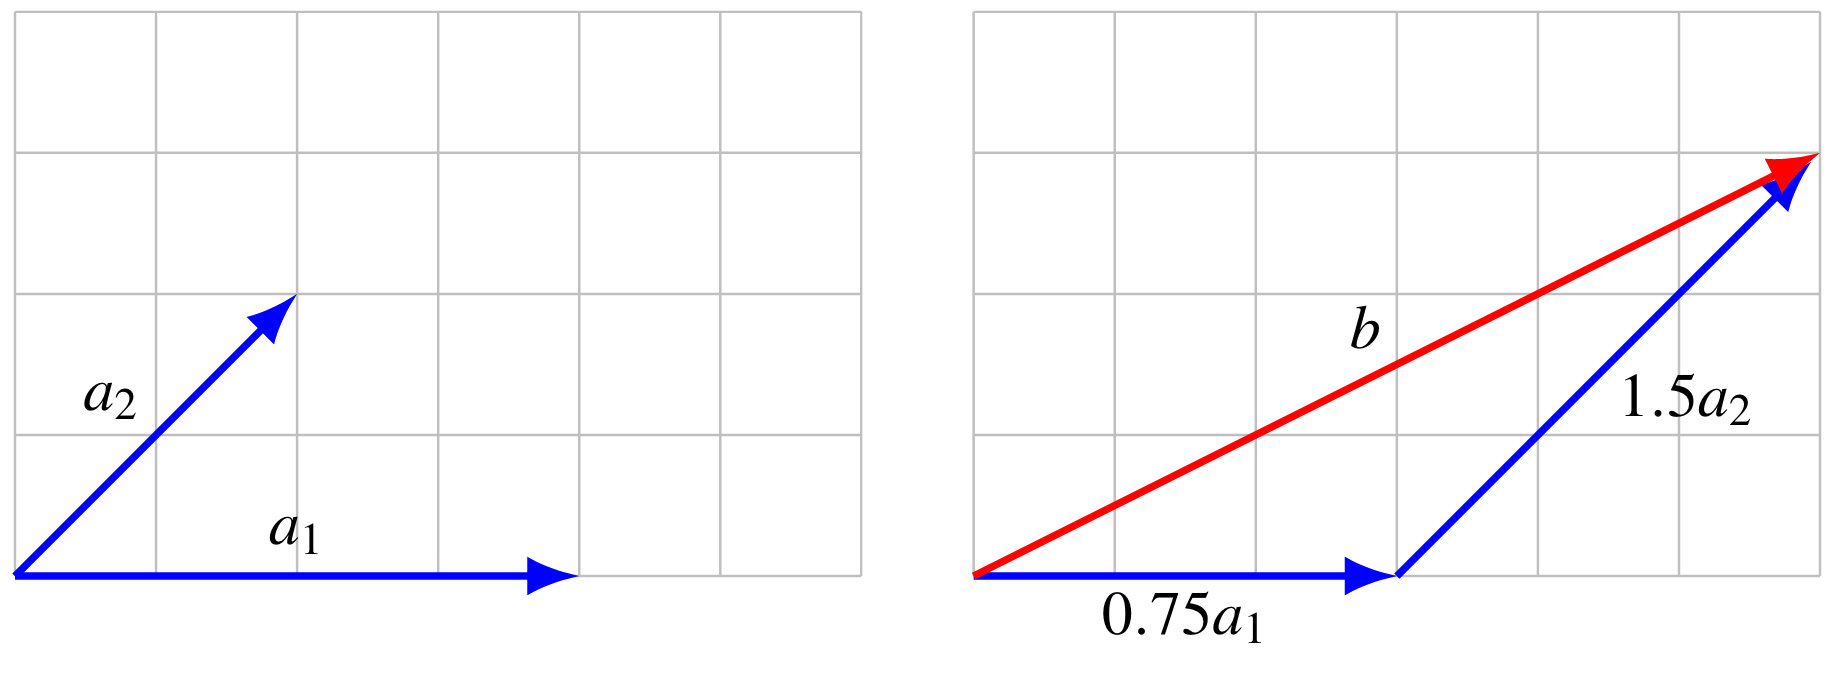

<a id='sec-ip'></a>

### Inner Product

$\color{#EF5645}{\text{Definition}}$: The inner product (or dot product) of n-vectors a and b is
$$a^T b = a_1b_1 + a_2b_2 + · · · + a_nb_n.$$
- Other notations: $$〈a, b〉, 〈a|b〉, (a, b), a · b.$$

$\color{#047C91}{\text{Exercise}}$: Compute the inner product of $a = (1, 0, 2)$ and $b = (-1, 1, 2)$.

$\color{#003660}{\text{In Python}}$, we use `inner` (from `numpy`).

In [38]:
"""Compute the inner product of two vectors."""
a = np.array([1,0,2])
b = np.array([-1,1,2])
np.inner(a, b)

3

### Orthogonal, Normalized, Orthonormal

$\color{#EF5645}{\text{Definitions}}$: The $n$-vectors $a_1, . . . , a_k$ are:
- _(mutually) orthogonal_ if $a_i ⊥ a_j$ for all $i , j$
- _normalized_ if $‖a_i ‖ = 1$ for $i = 1, . . . , k$
- _orthonormal_ if they are orthogonal and normalized.

$\color{#047C91}{\text{Example}}$: Give examples of orthogonal, normalized and orthonormal vectors in 2D. Draw them.

$\color{#6D7D33}{\text{Properties}}$: If $a_1, ..., a_k$ are orthonormal, then:
- $a_i^Ta_j = 0$ if $i\neq j$ and $a_i^Ta_i = 1$,
- $k\leq n$,
- $a_1, ..., a_k$ are linearly independent.

##### Outline: 05 Linear Independence

- [Linear Dependence](#sec-linear)
- [Linear Independence](#sec-linear)
- [Basis](#Basis)
- [Orthonormality](#Orthonormal)
- **[Orthonormal Basis](#Orthonormal)**

### Orthonormal Basis

$\color{#EF5645}{\text{Definition}}$: A set of $n$ orthonormal $n$-vectors is called an _orthonormal basis_ of $\mathbb{R}^n$.

$\color{#047C91}{\text{Example}}$:
- Vectors $e_1, ...., e_n$ form an orthonormal basis of $\mathbb{R}^n$
- These $3$-vectors form an orthonormal basis of $\mathbb{R}^3$:
 

<center><img src="figs/05_linearindep.png" width=400px alt="default"/></center>



$\color{#047C91}{\text{Exercise}}$: Show that the $3$-vectors above form an orthonormal basis using math computations.

$\color{#047C91}{\text{Exercise}}$: Show that these form an orthonormal basis using Python: 
<!-- $$a_1 = \begin{pmatrix}
    0 \\
    0 \\
    -1 
\end{pmatrix}, \quad a_2 = \begin{pmatrix}
    1 / \sqrt{2} \\
    1 / \sqrt{2} \\
    0
\end{pmatrix} \quad a_3 = \begin{pmatrix}
    1 / \sqrt{2} \\
    -1 / \sqrt{2} \\
    0
\end{pmatrix}$$ -->
<center><img src="figs/05_linearindep.png" width=400px alt="default"/></center>


In [3]:
import numpy as np
a1 = np.array([0, 0, 1])
a2 = np.array([1/np.sqrt(2), 1/np.sqrt(2), 0])
a3 = np.array([1/np.sqrt(2), -1/np.sqrt(2), 0])

print(np.inner(a1, a2)) # Do same for a1, a3 and a2, a3
print(np.linalg.norm(a1)) # Do same for a2 and a3

0.0
1.0


### Orthonormal Expansion

$\color{#6D7D33}{\text{Property}}$: If $a_1, . . . , a_n$ is an orthonormal basis of $\mathbb{R}^n$, then:
- Any $n$-vector $x$ can be written:
$$x = (a^T_1 x)a_1 + · · · + (a^T_n x)a_n.$$

$\color{#EF5645}{\text{Definition}}$: The formula above is called _orthonormal expansion of $x$_ in the orthonormal basis. 

### Properties of inner product

$\color{#6D7D33}{\text{Properties}}$: For $n$-vectors $a, b, c$ and scalars $\gamma$:
- $a^T b = b^T a$
- $(γa)^T b = γ(a^T b)$
- $(a + b)^T c = a^T c + b^T c$

### Example of inner-products in ECE


- Education: $p$ grades, $q$ weights; $p^T q$ is the total grade

- Deep Learning: 
  - each inner node is the result of an inner product
<center><img src="figs/01_nn.png" alt="default" width=310px/></center>

<center>Inner product in neural networks.</center>

# 06 Matrices

### Transpose

$\color{#EF5645}{\text{Definition}}$: The _transpose of an $m \times n$ matrix_ $A$ is a $n \times m$ matrix, written $A^T$, and is defined by:
$$ (A^T)_{ij} = A_{ji}, \quad i = 1,..., n \quad j=1,...,m$$

$\color{#047C91}{\text{Example}}$: $\begin{vmatrix}
0.2 & 1.2 & 10 \\
0 & -3 & 0
\end{vmatrix}^T = \begin{vmatrix}
0.2 & 0 \\
1.2 & -3 \\
10 & 0
\end{vmatrix}$

$\color{#003660}{\text{In Python}}$:

[[0.3 1.  0. ]
 [1.  1.  0.7]
 [0.  1.  0. ]]
[[0.3 1.  0. ]
 [1.  1.  1. ]
 [0.  0.7 0. ]]


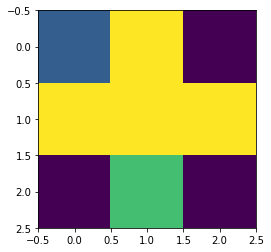

In [23]:
print(A); print(A.T); plt.imshow(A.T);

$\color{#6D7D33}{\text{Property}}$: The transpose verifies:
- $(A^T)^T = A$
- $(A + B)^T = A^T + B^T$

### Basic Operations

Just like vectors:
- we can add or subtract matrices of the same size,
- we can multiply a matrix by a scalar.

In [25]:
print(A); print(2 * A)

[[0.3 1.  0. ]
 [1.  1.  0.7]
 [0.  1.  0. ]]
[[0.6 2.  0. ]
 [2.  2.  1.4]
 [0.  2.  0. ]]


### Matrix Norm

$\color{#EF5645}{\text{Definition}}$: For a $m \times n$ matrix $A$, we define the _matrix norm_ as:

<center>
$||A|| = \sqrt{\sum_{i=1}^m \sum_{j=1}^n A_{ij}^2}.$</center>

$\color{#EF5645}{\text{Remark}}$: This definition agrees with the definition of norm of vectors when $n=1$ or $m=1$.

$\color{#047C91}{\text{Exercise}}$: Compute the matrix norm of $A = \begin{vmatrix}
1 & 0 & -1\\
0 & 1 & 1 \end{vmatrix}.$

$\color{#003660}{\text{In Python}}$, we use `np.linalg.norm`.

In [27]:
import numpy as np

A = np.array([
    [1, 0, -1],
    [0, 1, 1]
])
print(np.linalg.norm(A))

2.0


### Distance between two matrices

$\color{#EF5645}{\text{Definition}}$: The _distance_ between two matrices $A$ and $B$ is defined as:
$$dist(A, B) = ||A - B||.$$

$\color{#EF5645}{\text{Remark}}$: This means that the clustering algorithm, which only needs a notion of "distance", works on the matrices.